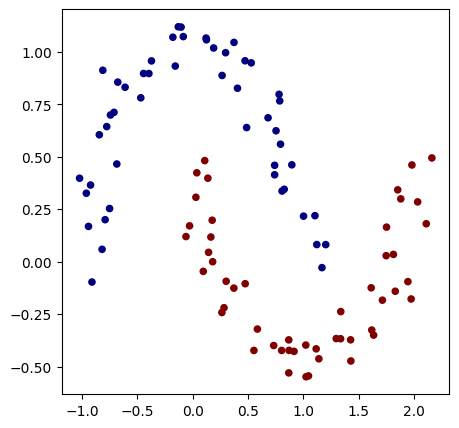

In [1]:
# make up a dataset
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1337)
random.seed(1337)
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')


In [8]:

from NeuralNets.Variable import Variable,Perceptron,Layer
model = Perceptron(3,((8,2),(8,8),(1,8,'tanh')))

def loss(batch_size=None):

    
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Variable, xrow)) for xrow in Xb]

    # forward the model to get scores
    scores = list(map(model, inputs))

    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss

    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Variable(1.0031597562393457 and grade:0.0) 0.5


In [6]:
for k in range(50):

    # forward
    total_loss, acc = loss()

    # backward
    for mp in model.parameters():
      mp.grade = 0.0
    total_loss.backpropogation()

    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grade

    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 0.7254851873528846, accuracy 79.0%
step 1 loss 0.690217020744095, accuracy 81.0%
step 2 loss 0.6859694692707433, accuracy 85.0%
step 3 loss 0.6976226082104622, accuracy 75.0%
step 4 loss 0.6777608193411414, accuracy 87.0%
step 5 loss 0.7049322417193111, accuracy 79.0%
step 6 loss 0.6605908171479963, accuracy 91.0%
step 7 loss 0.7036989002407478, accuracy 69.0%
step 8 loss 0.6853393600981712, accuracy 89.0%
step 9 loss 0.6675653574546975, accuracy 81.0%
step 10 loss 0.6542308418131534, accuracy 91.0%
step 11 loss 0.6462333787336376, accuracy 81.0%
step 12 loss 0.615402810968371, accuracy 89.0%
step 13 loss 0.6049531750103053, accuracy 84.0%
step 14 loss 0.6221870593972256, accuracy 92.0%
step 15 loss 0.610391398260495, accuracy 83.0%
step 16 loss 0.6027164729100546, accuracy 92.0%
step 17 loss 0.6332706926587756, accuracy 73.0%
step 18 loss 0.6929025263982987, accuracy 89.0%
step 19 loss 0.6511374220828935, accuracy 88.0%
step 20 loss 0.5907765523054154, accuracy 91.0%
step 

(-1.548639298268643, 1.951360701731357)

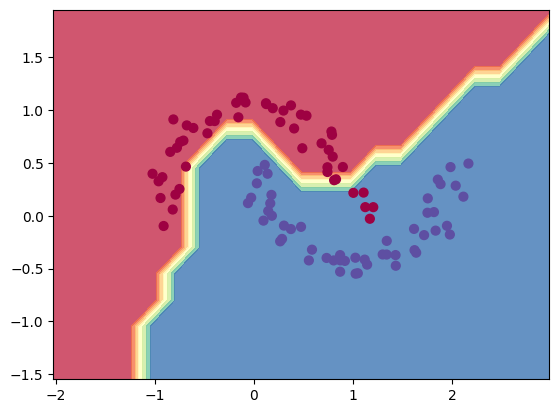

In [7]:

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Variable, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())